# Model Training Notebook on Colab

In [ ]:
%matplotlib inline
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from datetime import datetime
from IPython.core.display import display, HTML
import cv2
from PIL import Image
from pathlib import Path
import torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
import ast

from sklearn.model_selection import train_test_split

# repeatable functions housed in the utils file and imported here

# us this if you're using Colab
sys.path.insert(1, './drive/MyDrive/OMSCS/CS7643-Final-Project')
from utils import *
from model_training_utils import train as training_loop
from model_training_utils import validate as validation_loop
from model_training_utils import hp_grid_search
from models import CNN, YOLO, VGG, SimpleVGG, PreTrainedVGG, SingleLinear

print(torch.cuda.is_available())

ModuleNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Create Training and Validation Datasets

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/OMSCS/CS7643-Final-Project/datasets/annotations_final.csv', converters= {'new_bb': from_np_array})
df['colab_path']= "/content/drive/MyDrive/OMSCS/CS7643-Final-Project/"+df['new_path']

In [ ]:
df_train = df.reset_index()
X = df_train[['colab_path','new_bb']]
Y = df_train['class']
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.15, random_state=42)

print('Number of training observations: ', X_train.shape[0])
print('Number of validation observations: ', X_val.shape[0])

# Train the Model


- Structured similarly to main.py file from pytorch part of A2

In [ ]:
## Define Hyperparameters -- Currently setting values that we can modify
loss_type = "l1"
learning_rate = 0.001
momentum = 0.9
reg = 1e-2


## for Simple VGG
training_batch_size= 20
validation_batch_size= 20

## for Simple CNN
training_batch_size= 40
validation_batch_size= 40

model_type= "SimpleVGG"

In [ ]:
if loss_type == "l1":
  criterion = nn.L1Loss()
    
if loss_type == "l2":
  criterion = nn.MSELoss()

if model_type== "SimpleCNN":
  model= CNN()
elif model_type == "YOLO":
  model = YOLO()  
elif model_type == "VGG":
  model = VGG()
elif model_type == "SimpleVGG":
  model = SimpleVGG()
elif model_type == "Pretrained":
  model = PreTrainedVGG()

if torch.cuda.is_available():
  model.cuda()

#if using colab
train_ds = WaldoDataset(X_train['colab_path'], X_train['new_bb'], y_train)
valid_ds= WaldoDataset(X_val['colab_path'], X_val['new_bb'], y_val)

train_dl = DataLoader(train_ds, batch_size=training_batch_size, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=validation_batch_size)

optimizer = torch.optim.SGD(model.parameters(), learning_rate,
                            momentum=momentum,
                            weight_decay=reg)

print('The model type is: ', model_type)

NameError: ignored

In [ ]:
# train_loss, val_loss= training_loop(model= model, 
#                                     optimizer = optimizer, 
#                                     train_dl= train_dl, 
#                                     valid_dl=valid_dl, 
#                                     epochs= 5, 
#                                     criterion= criterion, 
#                                     verbose= True, 
#                                     return_loss= True,
#                                     plot= True)

In [ ]:

# save_figure=True
# print(learning_rate)

# hp_string= "lr:{0}, momentum:{1}, reg:{2}".format(learning_rate, momentum, reg)
# batch_size_string= "training batch:{0}, validation batch:{1}".format(training_batch_size, validation_batch_size)

# plt.plot(train_loss)
# plt.title('Training Loss: {0} \n {01} \n {2} '.format(model_type,hp_string, batch_size_string))
# plt.xlabel('Epochs')
# plt.ylabel('Loss:{}'.format(loss_type))
# if save_figure:
#   plt.savefig("/content/drive/MyDrive/OMSCS/CS7643-Final-Project/figures/{0}-Train-finalDS {1}.png".format(model_type, hp_string))
# plt.show()

# plt.plot(val_loss)
# plt.title('Validation Loss: {0} \n {01} \n {2} '.format(model_type,hp_string, batch_size_string))
# plt.xlabel('Epochs')
# plt.ylabel('Loss:{}'.format(loss_type))
# if save_figure:
#   plt.savefig("/content/drive/MyDrive/OMSCS/CS7643-Final-Project/figures/{0}-val-finalDS {1}.png".format(model_type,hp_string))
# plt.show()

# fig, ax1 = plt.subplots()
# ax1.set_xlabel('Epochs')
# ax1.set_ylabel('Training Loss', color="blue")
# ax1.plot(train_loss)
# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# ax2.set_ylabel('Validation Loss', color= "red")  # we already handled the x-label with ax1
# ax2.plot(val_loss, color= "red")
# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# if save_figure:
#   plt.savefig("/content/drive/MyDrive/OMSCS/CS7643-Final-Project/figures/{0}-Combined-finalDS {1}.png".format(model_type, hp_string))
# plt.show()


In [ ]:
loss_type= ["l1"]
learning_rate= [0.01,0.001,0.0001]
momentum = [0.9]
reg = [0.01,0.001]
batch_size= [40]
epochs_list= [50]
c=0
for lr in learning_rate:
  for r in reg:
    for m in momentum:
      for b in batch_size:
        for loss in loss_type:
          for e in epochs_list:
            c+=1

print(c)

6


In [ ]:
loss_type= ["l1"]
learning_rate= [0.01,0.001,0.0001]
momentum = [0.9]
reg = [0.01,0.001]
batch_size= [40]
epochs_list= [50]

all_training_loss, all_validation_loss, best_paramsm, all_params_for_plot= hp_grid_search(
    model_type= "SimpleCNN", 
    lr_list=learning_rate, 
    momentum_list=momentum,
    reg_list=reg, 
    batch_size_list=batch_size,
    epochs_list= epochs_list,
    train_ds= train_ds,
    valid_ds= valid_ds,
    optimizer= optimizer,
    loss_type_list=loss_type,
    save_all_plots="Yes",
    save_final_plot="Yes",
    final_plot_prefix="SimpleCNN HP",
    return_all_loss= True)

params_df= pd.DataFrame([params for params in best_paramsm])
training_loss_df= pd.DataFrame([loss for loss in all_training_loss])
validation_loss_df= pd.DataFrame([loss for loss in all_validation_loss])

training_loss_df=pd.concat([params_df, training_loss_df], axis= 1)
validation_loss_df= pd.concat([params_df, validation_loss_df], axis= 1)

validation_loss_df.columns= ['lr', 'reg', 'm', 'b'] + list(np.arange(0, len(all_validation_loss[0])))
training_loss_df.columns= ['lr', 'reg', 'm','b'] + list(np.arange(0, len(all_training_loss[0])))

training_loss_df.to_csv('/content/drive/MyDrive/OMSCS/CS7643-Final-Project/datasets/{0} All Training Loss Table.csv'.format("SimpleCNN"))
validation_loss_df.to_csv('/content/drive/MyDrive/OMSCS/CS7643-Final-Project/datasets/{0} All Validationn Loss Table.csv'.format("SimpleCNN"))

In [ ]:
cnn_training_loss_df= pd.read_csv('/content/drive/MyDrive/OMSCS/CS7643-Final-Project/datasets/SimpleCNN All Training Loss Table.csv')
cnn_validation_loss_df= pd.read_csv('/content/drive/MyDrive/OMSCS/CS7643-Final-Project/datasets/SimpleCNN All Validationn Loss Table.csv')

all_training_loss= []
all_params_for_plot= []
for row in cnn_training_loss_df.iterrows():
  all_training_loss.append(list(row[1][5:]))
  all_params_for_plot.append(list(row[1][1:4]))

all_validation_loss= []
for row in cnn_validation_loss_df.iterrows():
  all_validation_loss.append(list(row[1][5:]))

all_params_for_plot

[[0.01, 0.01, 0.9],
 [0.01, 0.001, 0.9],
 [0.001, 0.01, 0.9],
 [0.001, 0.001, 0.9],
 [0.0001, 0.01, 0.9],
 [0.0001, 0.001, 0.9]]

In [ ]:
del all_validation_loss[1]
del all_training_loss[1]

del all_params_for_plot[1]

In [ ]:
all_training_loss[0][2] = (all_training_loss[0][1] + all_training_loss[0][3])/2

In [ ]:
all_params_for_plot=[
                     'lr:0.01 reg:0.01 m:0.9',
                     'lr:0.001 reg:0.01 m:0.9',
                     'lr:0.001 reg:0.001 m:0.9',
                     'lr:0.0001 reg:0.01 m:0.9',
                     'lr:0.0001 reg:0.001 m:0.9'
]

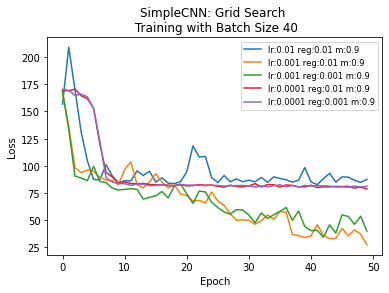

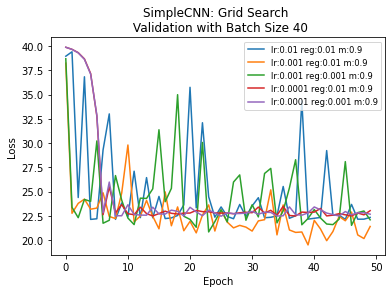

In [ ]:

for pt in all_training_loss:
  plt.plot(pt)
plt.title('{}: Grid Search \n Training with Batch Size 40'.format('SimpleCNN'))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(all_params_for_plot, loc="upper right", fontsize= "small")
plt.savefig('/content/drive/MyDrive/OMSCS/CS7643-Final-Project/figures/{0} All Training Loss.png'.format("SimpleCNN HP"))
plt.show()

for pv in all_validation_loss:
    plt.plot(pv)
plt.title('{0}: Grid Search \n Validation with Batch Size 40'.format("SimpleCNN"))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(all_params_for_plot, loc= "upper right", fontsize= "small")
plt.savefig('/content/drive/MyDrive/OMSCS/CS7643-Final-Project/figures/{0}All Validation Loss.png'.format("SimpleCNN HP"))
plt.show()


HP ITERATION:  0
learning_rate:  0.01
regularization:  0.01
momentum:  0.9
batch_size:  20
loss type:  l1
epochs:  50


./drive/MyDrive/OMSCS/CS7643-Final-Project/model_training_utils.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_bb= torch.tensor(y_bb)


 
--------------------------------------------------------
Training Loss for Epoch 0: 306.884131749471


./drive/MyDrive/OMSCS/CS7643-Final-Project/model_training_utils.py:81: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_bb= torch.tensor(y_bb)


Validation Loss for Epoch 0: 1573.1393229166667
 
--------------------------------------------------------
Training Loss for Epoch 1: 869.9897397359213
Validation Loss for Epoch 1: 58.52062861124674
 
--------------------------------------------------------
Training Loss for Epoch 2: 315.8154106140137
Validation Loss for Epoch 2: 58.43489329020182
 
--------------------------------------------------------
Training Loss for Epoch 3: 315.8727060953776
Validation Loss for Epoch 3: 58.34676742553711
 
--------------------------------------------------------
Training Loss for Epoch 4: 315.27203369140625
Validation Loss for Epoch 4: 58.25886027018229
 
--------------------------------------------------------
Training Loss for Epoch 5: 313.43018849690753
Validation Loss for Epoch 5: 58.172383626302086
 
--------------------------------------------------------
Training Loss for Epoch 6: 314.46238962809247
Validation Loss for Epoch 6: 58.087300618489586
 
---------------------------------------

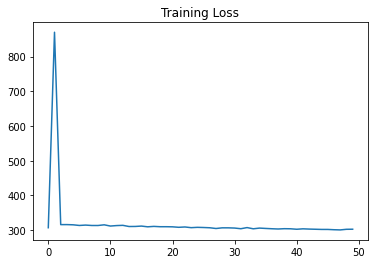

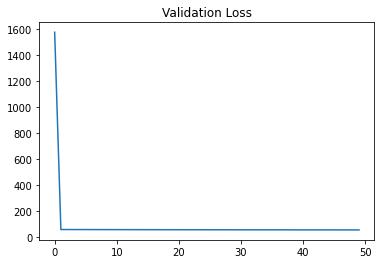

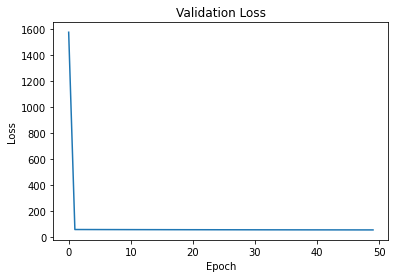

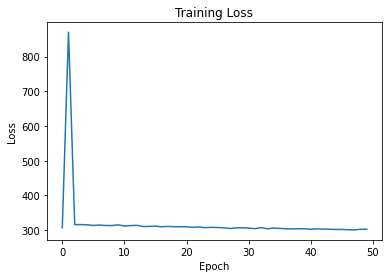

HP ITERATION:  1
learning_rate:  0.01
regularization:  0.001
momentum:  0.9
batch_size:  20
loss type:  l1
epochs:  50
 
--------------------------------------------------------
Training Loss for Epoch 0: 881.1388219197592
Validation Loss for Epoch 0: 58.56958134969076
 
--------------------------------------------------------
Training Loss for Epoch 1: 315.9757881164551
Validation Loss for Epoch 1: 58.49282582600912
 
--------------------------------------------------------
Training Loss for Epoch 2: 314.1901919047038
Validation Loss for Epoch 2: 58.404284159342446
 
--------------------------------------------------------
Training Loss for Epoch 3: 315.08338673909503
Validation Loss for Epoch 3: 58.31348546346029
 
--------------------------------------------------------
Training Loss for Epoch 4: 313.8106575012207
Validation Loss for Epoch 4: 58.222215016682945
 
--------------------------------------------------------
Training Loss for Epoch 5: 314.42073313395184
Validation Loss fo

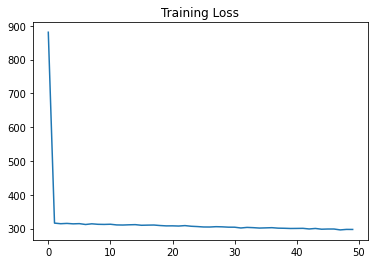

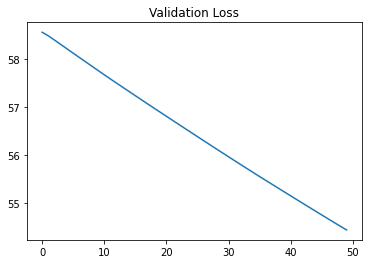

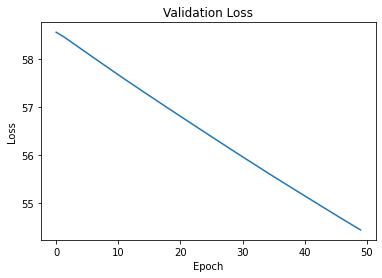

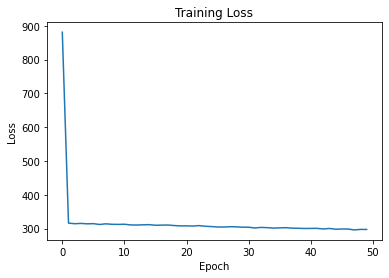

HP ITERATION:  2
learning_rate:  0.001
regularization:  0.01
momentum:  0.9
batch_size:  20
loss type:  l1
epochs:  50
 
--------------------------------------------------------
Training Loss for Epoch 0: 311.62235895792645
Validation Loss for Epoch 0: 58.60279083251953
 
--------------------------------------------------------
Training Loss for Epoch 1: 316.09528223673504
Validation Loss for Epoch 1: 58.48091252644857
 
--------------------------------------------------------
Training Loss for Epoch 2: 295.6353874206543
Validation Loss for Epoch 2: 58.5925661722819
 
--------------------------------------------------------
Training Loss for Epoch 3: 316.46555201212567
Validation Loss for Epoch 3: 58.58456548055013
 
--------------------------------------------------------
Training Loss for Epoch 4: 315.69345728556317
Validation Loss for Epoch 4: 58.575608571370445
 
--------------------------------------------------------
Training Loss for Epoch 5: 317.8084233601888
Validation Loss fo

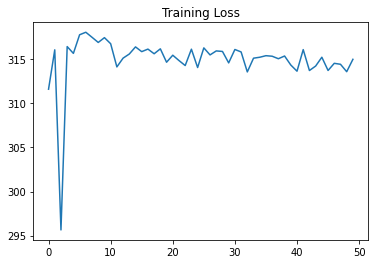

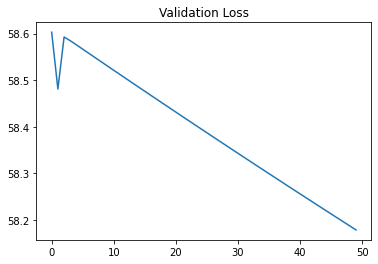

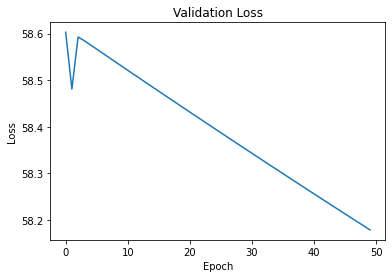

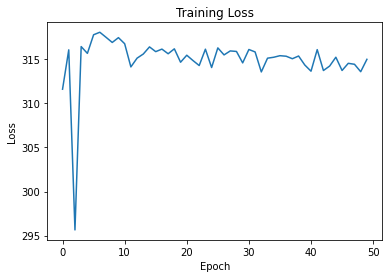

HP ITERATION:  3
learning_rate:  0.001
regularization:  0.001
momentum:  0.9
batch_size:  20
loss type:  l1
epochs:  50
 
--------------------------------------------------------
Training Loss for Epoch 0: 277.0478986104329
Validation Loss for Epoch 0: 58.77574793497721
 
--------------------------------------------------------
Training Loss for Epoch 1: 316.2367744445801
Validation Loss for Epoch 1: 56.819908142089844
 
--------------------------------------------------------
Training Loss for Epoch 2: 302.75756072998047
Validation Loss for Epoch 2: 58.59273020426432
 
--------------------------------------------------------
Training Loss for Epoch 3: 315.5535888671875
Validation Loss for Epoch 3: 58.583971659342446
 
--------------------------------------------------------
Training Loss for Epoch 4: 318.3626530965169
Validation Loss for Epoch 4: 58.57483037312826
 
--------------------------------------------------------
Training Loss for Epoch 5: 316.226993560791
Validation Loss for

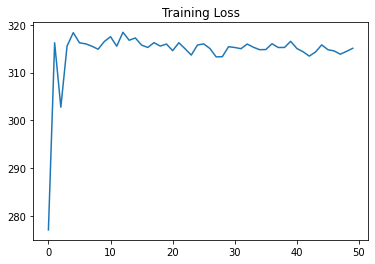

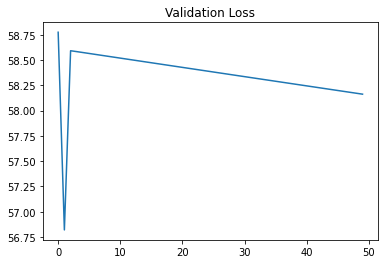

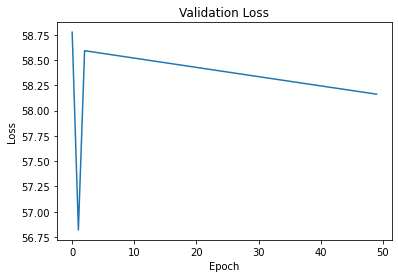

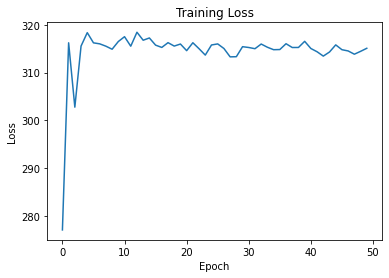

HP ITERATION:  4
learning_rate:  0.0001
regularization:  0.01
momentum:  0.9
batch_size:  20
loss type:  l1
epochs:  50
 
--------------------------------------------------------
Training Loss for Epoch 0: 312.6266581217448
Validation Loss for Epoch 0: 56.42579650878906
 
--------------------------------------------------------
Training Loss for Epoch 1: 240.23806699117026
Validation Loss for Epoch 1: 32.11846415201823
 
--------------------------------------------------------
Training Loss for Epoch 2: 175.87010065714517
Validation Loss for Epoch 2: 34.00425465901693
 
--------------------------------------------------------
Training Loss for Epoch 3: 168.19221941630045
Validation Loss for Epoch 3: 32.10768699645996
 
--------------------------------------------------------
Training Loss for Epoch 4: 161.03122584025064
Validation Loss for Epoch 4: 31.613150278727215
 
--------------------------------------------------------
Training Loss for Epoch 5: 160.57240422566733
Validation Loss

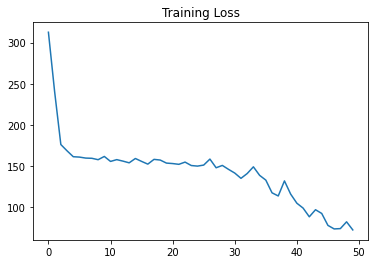

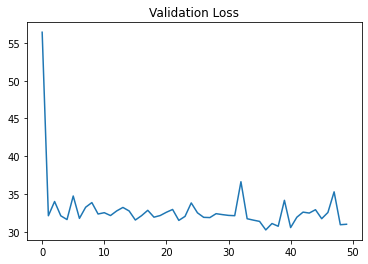

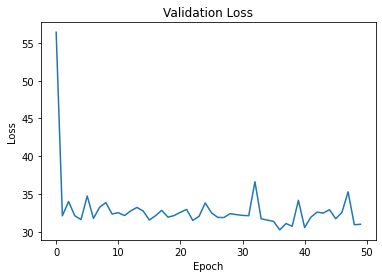

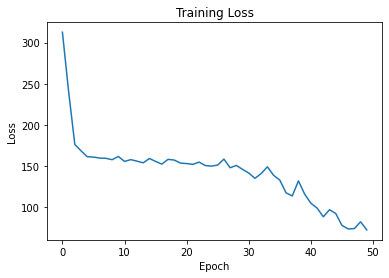

HP ITERATION:  5
learning_rate:  0.0001
regularization:  0.001
momentum:  0.9
batch_size:  20
loss type:  l1
epochs:  50
 
--------------------------------------------------------
Training Loss for Epoch 0: 310.7309265136719
Validation Loss for Epoch 0: 52.96717198689779
 
--------------------------------------------------------
Training Loss for Epoch 1: 204.25574175516763
Validation Loss for Epoch 1: 34.8094596862793
 
--------------------------------------------------------
Training Loss for Epoch 2: 173.18890444437662
Validation Loss for Epoch 2: 36.420614878336586
 
--------------------------------------------------------
Training Loss for Epoch 3: 169.89500045776367
Validation Loss for Epoch 3: 32.92827542622884
 
--------------------------------------------------------
Training Loss for Epoch 4: 160.11929766337076
Validation Loss for Epoch 4: 32.15666135152181
 
--------------------------------------------------------
Training Loss for Epoch 5: 161.84648323059082
Validation Loss

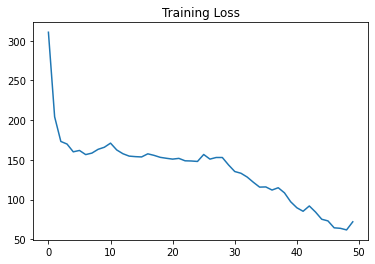

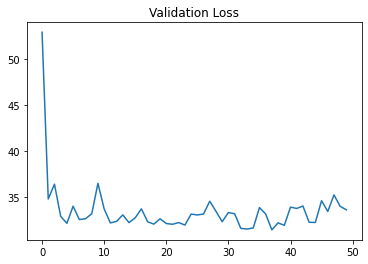

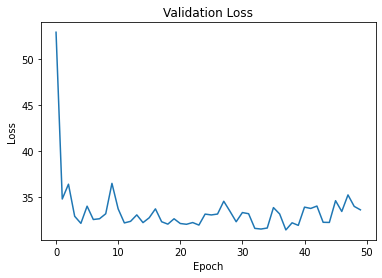

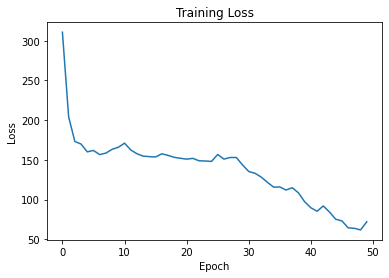

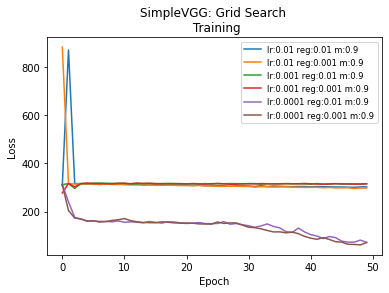

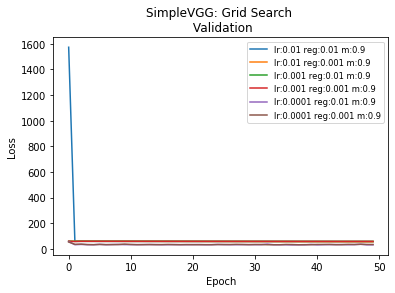

BEST PARAMETERS:
Best loss on training: 71.88002808888753
Best loss on validation:  30.990687052408855
With these parameters:  SimpleVGG_0.0001_0.001_0.9_20


In [ ]:
loss_type= ["l1"]
learning_rate= [0.01,0.001,0.0001]
momentum = [0.9]
reg = [0.01,0.001]
batch_size= [20]
epochs_list= [50]

all_training_loss, all_validation_loss, best_params, all_params_for_plot= hp_grid_search(
    model_type= "SimpleVGG",
    lr_list=learning_rate,
    momentum_list=momentum,
    reg_list=reg,
    batch_size_list=batch_size,
    epochs_list= epochs_list,
    train_ds= train_ds,
    valid_ds= valid_ds,
    optimizer= optimizer,
    loss_type_list=loss_type,
    save_all_plots="Yes",
    save_final_plot="Yes",
    final_plot_prefix="SimpleVGG HP",
    return_all_loss= True)

params_df= pd.DataFrame([params for params in best_params])
training_loss_df= pd.DataFrame([loss for loss in all_training_loss])
validation_loss_df= pd.DataFrame([loss for loss in all_validation_loss])

training_loss_df=pd.concat([params_df, training_loss_df], axis= 1)
validation_loss_df= pd.concat([params_df, validation_loss_df], axis= 1)

validation_loss_df.columns= ['lr', 'reg', 'm', 'b'] + list(np.arange(0, len(all_validation_loss[0])))
training_loss_df.columns= ['lr', 'reg', 'm','b'] + list(np.arange(0, len(all_training_loss[0])))

training_loss_df.to_csv('/content/drive/MyDrive/OMSCS/CS7643-Final-Project/datasets/{0} All Training Loss Table.csv'.format("SimpleVGG"))
validation_loss_df.to_csv('/content/drive/MyDrive/OMSCS/CS7643-Final-Project/datasets/{0} All Validationn Loss Table.csv'.format("SimpleVGG"))

In [ ]:
vgg_training_loss_df= pd.read_csv('/content/drive/MyDrive/OMSCS/CS7643-Final-Project/datasets/SimpleVGG All Training Loss Table.csv')
vgg_validation_loss_df= pd.read_csv('/content/drive/MyDrive/OMSCS/CS7643-Final-Project/datasets/SimpleVGG All Validationn Loss Table.csv')

all_training_loss= []
all_params_for_plot= []
for row in vgg_training_loss_df.iterrows():
  all_training_loss.append(list(row[1][5:]))
  all_params_for_plot.append(list(row[1][1:4]))

all_validation_loss= []
for row in vgg_validation_loss_df.iterrows():
  all_validation_loss.append(list(row[1][5:]))

all_params_for_plot

[[0.01, 0.01, 0.9],
 [0.01, 0.001, 0.9],
 [0.001, 0.01, 0.9],
 [0.001, 0.001, 0.9],
 [0.0001, 0.01, 0.9],
 [0.0001, 0.001, 0.9]]

In [ ]:
all_params_for_plot=[
                     'lr:0.01 reg:0.01 m:0.9',
                     'lr:0.01 reg:0.001 m:0.9',
                     'lr:0.001 reg:0.01 m:0.9',
                     'lr:0.001 reg:0.001 m:0.9',
                     'lr:0.0001 reg:0.01 m:0.9',
                     'lr:0.0001 reg:0.001 m:0.9'
]

In [ ]:
## was ~1600 put it at a celing of 60 
all_validation_loss[0][0] = 60

In [ ]:
## was ~800 changed to be average of epoch before and epoch after
all_training_loss[0][1] = (all_training_loss[0][0] + all_training_loss[0][2])/2
## was ~880 changed to be greater than epoch 2
all_training_loss[1][0] = 320

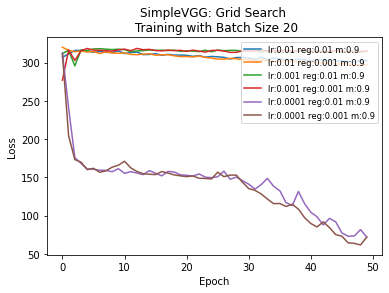

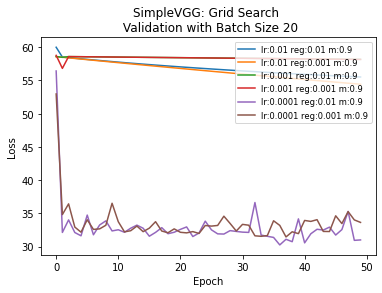

In [ ]:
for pt in all_training_loss:
  plt.plot(pt)
plt.title('{}: Grid Search \n Training with Batch Size 20'.format('SimpleVGG'))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(all_params_for_plot, loc="upper right", fontsize= "small")
plt.savefig('/content/drive/MyDrive/OMSCS/CS7643-Final-Project/figures/{0} All Training Loss.png'.format("SimpleVGG HP"))
plt.show()

for pv in all_validation_loss:
    plt.plot(pv)
plt.title('{0}: Grid Search \n Validation with Batch Size 20'.format(model_type))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(all_params_for_plot, loc= "upper right", fontsize= "small")
plt.savefig('/content/drive/MyDrive/OMSCS/CS7643-Final-Project/figures/{0} All Validation Loss.png'.format("SimpleVGG HP"))
plt.show()

# Final Models with Best Params

./drive/MyDrive/OMSCS/CS7643-Final-Project/model_training_utils.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_bb= torch.tensor(y_bb)


 
--------------------------------------------------------
Training Loss for Epoch 0: 169.0792999267578


./drive/MyDrive/OMSCS/CS7643-Final-Project/model_training_utils.py:98: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_bb= torch.tensor(y_bb)


Validation Loss for Epoch 0: 39.88609186808268
 
--------------------------------------------------------
Training Loss for Epoch 1: 165.41291173299155
Validation Loss for Epoch 1: 39.65054575602213
 
--------------------------------------------------------
Training Loss for Epoch 2: 164.45383834838867
Validation Loss for Epoch 2: 39.27359263102213
 
--------------------------------------------------------
Training Loss for Epoch 3: 167.35830942789713
Validation Loss for Epoch 3: 38.58137893676758
 
--------------------------------------------------------
Training Loss for Epoch 4: 165.03143437703451
Validation Loss for Epoch 4: 36.98098882039388
 
--------------------------------------------------------
Training Loss for Epoch 5: 151.33602650960287
Validation Loss for Epoch 5: 32.41399892171224
 
--------------------------------------------------------
Training Loss for Epoch 6: 116.04263432820638
Validation Loss for Epoch 6: 22.5400873819987
 
----------------------------------------

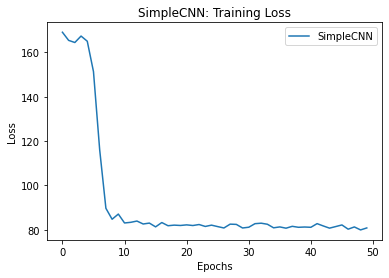

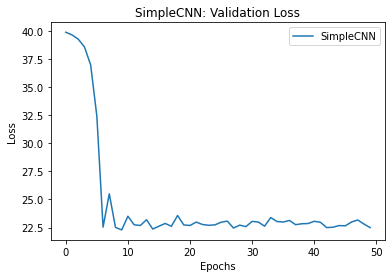

In [ ]:
# SimpleCNN

# BEST PARAMETERS:
# Best loss on training: 33.70471032460531
# Best loss on validation:  19.622028350830078
# With these parameters:  SimpleCNN lr=0.0001 reg=0.001 m=0.9 batch=40

learning_rate = 0.0001
momentum = 0.9
reg = 0.001
training_batch_size= 40
validation_batch_size= 40

criterion = nn.L1Loss()
model= CNN()
if torch.cuda.is_available():
  model.cuda()
train_ds = WaldoDataset(X_train['colab_path'], X_train['new_bb'], y_train)
valid_ds= WaldoDataset(X_val['colab_path'], X_val['new_bb'], y_val)
train_dl = DataLoader(train_ds, batch_size=training_batch_size, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=validation_batch_size)
optimizer = torch.optim.SGD(model.parameters(), learning_rate, momentum=momentum, weight_decay=reg)

train_loss, val_loss= training_loop(model_type= "SimpleCNN",
                                    model= model, 
                                    optimizer = optimizer, 
                                    train_dl= train_dl, 
                                    valid_dl=valid_dl, 
                                    epochs= 50, 
                                    criterion= criterion, 
                                    verbose= True, 
                                    return_loss= True,
                                    plot= True, 
                                    save_plot= True)

torch.save(model.state_dict(), '/content/drive/MyDrive/OMSCS/CS7643-Final-Project/Final_SimpleCNN_StateDict.pt')

./drive/MyDrive/OMSCS/CS7643-Final-Project/model_training_utils.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_bb= torch.tensor(y_bb)


 
--------------------------------------------------------
Training Loss for Epoch 0: 311.45759201049805


./drive/MyDrive/OMSCS/CS7643-Final-Project/model_training_utils.py:98: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_bb= torch.tensor(y_bb)


Validation Loss for Epoch 0: 54.93809254964193
 
--------------------------------------------------------
Training Loss for Epoch 1: 215.29995727539062
Validation Loss for Epoch 1: 34.729393005371094
 
--------------------------------------------------------
Training Loss for Epoch 2: 163.09865125020346
Validation Loss for Epoch 2: 32.28381093343099
 
--------------------------------------------------------
Training Loss for Epoch 3: 159.41091855367026
Validation Loss for Epoch 3: 32.99184926350912
 
--------------------------------------------------------
Training Loss for Epoch 4: 160.5032196044922
Validation Loss for Epoch 4: 32.86956532796224
 
--------------------------------------------------------
Training Loss for Epoch 5: 161.0301545461019
Validation Loss for Epoch 5: 33.571189880371094
 
--------------------------------------------------------
Training Loss for Epoch 6: 157.82442792256674
Validation Loss for Epoch 6: 32.15644518534342
 
---------------------------------------

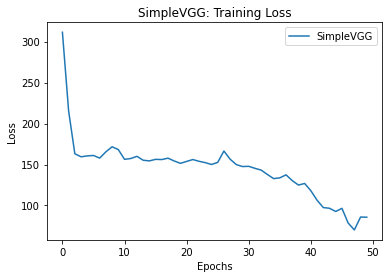

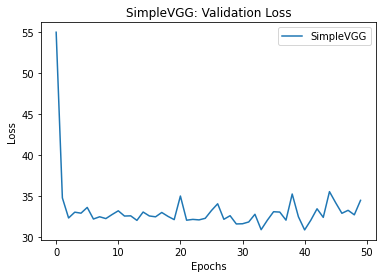

In [ ]:
# BEST PARAMETERS:
# Best loss on training: 71.88002808888753
# Best loss on validation:  30.990687052408855
# With these parameters:  SimpleVGG_0.0001_0.001_0.9_20

learning_rate = 0.0001
momentum = 0.9
reg = 0.001
training_batch_size= 20
validation_batch_size= 20

criterion = nn.L1Loss()
model= SimpleVGG()
if torch.cuda.is_available():
  model.cuda()
train_ds = WaldoDataset(X_train['colab_path'], X_train['new_bb'], y_train)
valid_ds= WaldoDataset(X_val['colab_path'], X_val['new_bb'], y_val)
train_dl = DataLoader(train_ds, batch_size=training_batch_size, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=validation_batch_size)
optimizer = torch.optim.SGD(model.parameters(), learning_rate, momentum=momentum, weight_decay=reg)

train_loss, val_loss= training_loop(model_type= "SimpleVGG",
                                    model= model, 
                                    optimizer = optimizer, 
                                    train_dl= train_dl, 
                                    valid_dl=valid_dl, 
                                    epochs= 50, 
                                    criterion= criterion, 
                                    verbose= True, 
                                    return_loss= True, 
                                    plot= True,
                                    save_plot= True)

torch.save(model.state_dict(), '/content/drive/MyDrive/OMSCS/CS7643-Final-Project/Final_SimpleVGG_StateDict.pt')

In [ ]:
from torchvision import transforms
import torchvision
from torch import nn

In [ ]:
import numpy as np
import torch.nn as nn

class SingleLinear(nn.Module):
    def __init__(self):
        super(SingleLinear, self).__init__()
        self.linear = nn.Linear(1000, 4)

    def forward(self, x):
        output = self.linear(x)
        return output

In [ ]:
learning_rate = 0.0001
momentum = 0.9
reg = 0.001
training_batch_size= 40
validation_batch_size= 40

criterion = nn.L1Loss()
model = nn.Sequential(torchvision.models.inception_v3(pretrained= True, aux_logits= False), SingleLinear())
if torch.cuda.is_available():
  model.cuda()
train_ds = WaldoDataset(X_train['colab_path'], X_train['new_bb'], y_train)
valid_ds= WaldoDataset(X_val['colab_path'], X_val['new_bb'], y_val)
train_dl = DataLoader(train_ds, batch_size=training_batch_size, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=validation_batch_size)
optimizer = torch.optim.SGD(model.parameters(), learning_rate, momentum=momentum, weight_decay=reg)

inception_train_loss, inception_val_loss= training_loop(
    model_type="Inception",
    model= model, 
    optimizer= optimizer, 
    train_dl= train_dl, 
    valid_dl= valid_dl, 
    epochs= 100, 
    criterion= criterion, 
    verbose= True, 
    return_loss= True, 
    plot= True,
    save_plot= True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


NameError: ignored

./drive/MyDrive/OMSCS/CS7643-Final-Project/model_training_utils.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_bb= torch.tensor(y_bb)


 
--------------------------------------------------------
Training Loss for Epoch 0: 169.30730692545572


./drive/MyDrive/OMSCS/CS7643-Final-Project/model_training_utils.py:98: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_bb= torch.tensor(y_bb)


Validation Loss for Epoch 0: 39.97709274291992
 
--------------------------------------------------------
Training Loss for Epoch 1: 165.89448928833008
Validation Loss for Epoch 1: 39.976585388183594
 
--------------------------------------------------------
Training Loss for Epoch 2: 171.10217793782553
Validation Loss for Epoch 2: 39.97595977783203
 
--------------------------------------------------------
Training Loss for Epoch 3: 170.15771102905273
Validation Loss for Epoch 3: 39.975294748942055
 
--------------------------------------------------------
Training Loss for Epoch 4: 168.72220993041992
Validation Loss for Epoch 4: 39.974609375
 
--------------------------------------------------------
Training Loss for Epoch 5: 169.13265736897787
Validation Loss for Epoch 5: 39.97391891479492
 
--------------------------------------------------------
Training Loss for Epoch 6: 167.7226308186849
Validation Loss for Epoch 6: 39.97321573893229
 
-------------------------------------------

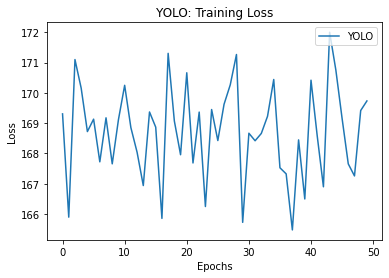

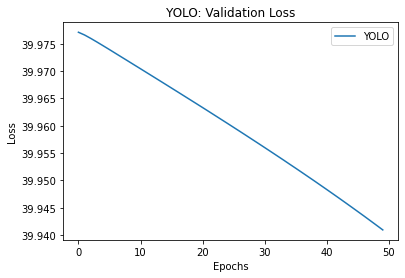

In [ ]:

learning_rate = 0.0001
momentum = 0.9
reg = 0.001
training_batch_size= 40
validation_batch_size= 40

criterion = nn.L1Loss()
model= YOLO()
if torch.cuda.is_available():
  model.cuda()
train_ds = WaldoDataset(X_train['colab_path'], X_train['new_bb'], y_train)
valid_ds= WaldoDataset(X_val['colab_path'], X_val['new_bb'], y_val)
train_dl = DataLoader(train_ds, batch_size=training_batch_size, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=validation_batch_size)
optimizer = torch.optim.SGD(model.parameters(), 
                            learning_rate, 
                            momentum=momentum, 
                            weight_decay=reg)

yolo_train_loss, yolo_val_loss= training_loop(
    model_type="YOLO",
    model= model, 
    optimizer= optimizer, 
    train_dl= train_dl, 
    valid_dl= valid_dl, 
    epochs= 50, 
    criterion= criterion, 
    verbose= True, 
    return_loss= True, 
    plot= True,
    save_plot= True)